In [36]:
!wget https://www.dropbox.com/s/webw4cr5dsnm3jv/iris1.csv

--2023-11-29 15:27:17--  https://www.dropbox.com/s/webw4cr5dsnm3jv/iris1.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.4.18, 2620:100:6019:18::a27d:412
Connecting to www.dropbox.com (www.dropbox.com)|162.125.4.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/webw4cr5dsnm3jv/iris1.csv [following]
--2023-11-29 15:27:17--  https://www.dropbox.com/s/raw/webw4cr5dsnm3jv/iris1.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc3113b89a3b1787f284cb132c6d.dl.dropboxusercontent.com/cd/0/inline/CIeBIS04_xdoxMJtvgqiXumzx2Rg9nDbX9Do2iAnP2uxWFg9PIsKzVKtYtN6b9fcY-LKbbptk85naEkd3gMgFRDItTRkcy8EK0ryfRdMBT1kpIzmhNNuPL4_fmrPeU_4C2hsCli_BSf71_J_1ZDAhBPG/file# [following]
--2023-11-29 15:27:17--  https://uc3113b89a3b1787f284cb132c6d.dl.dropboxusercontent.com/cd/0/inline/CIeBIS04_xdoxMJtvgqiXumzx2Rg9nDbX9Do2iAnP2uxWFg9PIsKzVKtYtN6b9fcY-LKbbptk85naEkd3gMgFRDItTRkcy8EK0ryfRdMBT1kpIz

Question-1: Load and analyze the data

Load the data in a pandas DataFrame

Have a look at the first five rows

Check if the dataset contains any null values

Check the shape of the datase




In [56]:
# importing the headers

import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [38]:
# Reading the table to Pandas DataFrame

orgin_data = pd.read_csv("/content/iris1.csv")

In [39]:
# Displayed the first five rows of data

orgin_data.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Class
0,5.1,3.5,1.4,0.2,Iris-Setosa
1,4.9,3.0,1.4,0.2,Iris-Setosa
2,4.7,3.2,1.3,0.2,Iris-Setosa
3,4.6,3.1,1.5,0.2,Iris-Setosa
4,5.0,NaN,1.4,0.2,Iris-Setosa


In [40]:
# Check the dataset contains any null values

orgin_data.isna()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Class
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,True,False,False,False
...,...,...,...,...,...
145,False,False,True,False,False
146,False,False,False,False,False
147,False,False,False,False,False
148,False,True,False,False,False


In [41]:
orgin_data.isna().sum()

sepal length (cm)     0
sepal width (cm)     30
petal length (cm)    68
petal width (cm)      0
Class                 0
dtype: int64

1. There are 30 null values in column sepalwidth and 68 null values in petal length

In [42]:
# shape of the Dataset

orgin_data.shape

(150, 5)

Question-2: Handle null values
Tasks to do:

Handle null values

If a column has more than 40% null values, drop that column

Else fill the null values with mean of that column

In [43]:
for column in list(orgin_data.columns):
  if orgin_data[column].isnull().sum()>(0.40*100):
    orgin_data.drop(columns=column,axis=1,inplace=True) # if the null value is more than 40% drop the column
  elif orgin_data[column].isnull().sum():
    orgin_data[column].replace(np.nan,orgin_data[column].mean(),inplace=True)# Replace other values with Mean of values
  else:
    continue

In [44]:
# Displaying the datasets without null values
orgin_data.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal width (cm)     0
Class                0
dtype: int64

Question-3: We can not use string objects for prediction so convert,
categorical feature to numerical feature

Tasks to do:

Convert the categorical features to numerical values
using Label Encoder from sklearn

In [45]:
orgin_data.tail(4)

,sepal length (cm),sepal width (cm),petal width (cm),Class
146,6.3,2.5000,1.9,Iris-Virginica
147,6.5,3.0000,2.0,Iris-Virginica
148,6.2,3.0575,2.3,Iris-Virginica
149,5.9,3.0000,1.8,Iris-Virginica


In [46]:
# Class is the only categorical value column which needs to be converted to Numerical

le = LabelEncoder()
orgin_data['Class'] = le.fit_transform(orgin_data['Class'])
print(orgin_data.head(3))
print(orgin_data['Class'].unique())

   sepal length (cm)  sepal width (cm)  petal width (cm)  Class
0                5.1               3.5               0.2      0
1                4.9               3.0               0.2      0
2                4.7               3.2               0.2      0
[0 1 2]


Question-4: Handle outlier

Tasks to do:

Check for outlier in all the columns using boxplot.

If there are outliers, clip them, lower limit will be Q1-1.5 IQR and upper limit will be

Q3+1.5 IQR.

Q1 = 1st Quartile (25%)

Q3 = 3rd Quartile (75%)

IQR = Inter-quartile range (Q3-Q1)

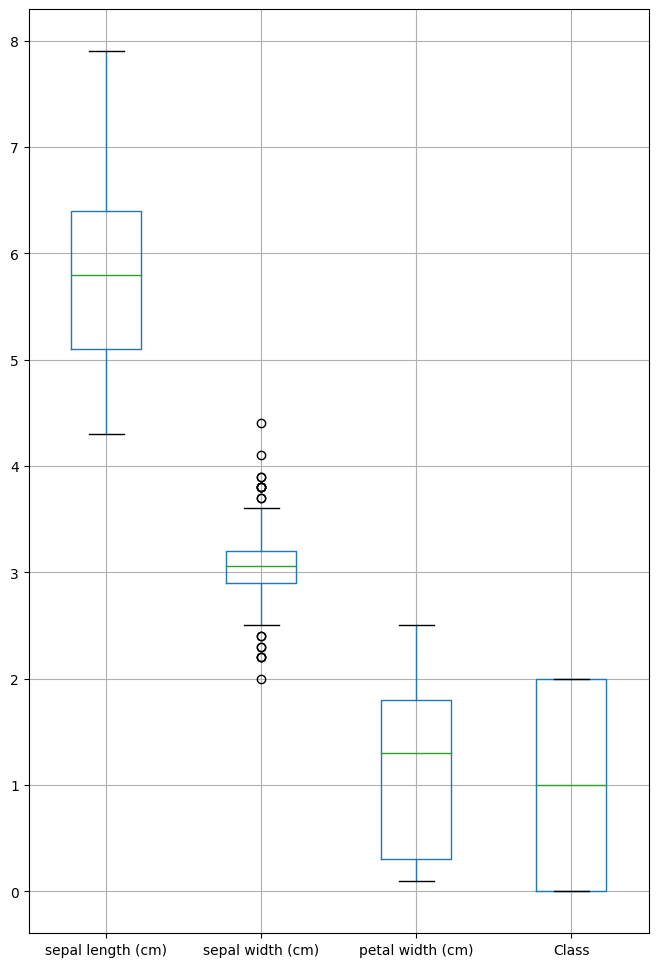

In [47]:
# plot a box plot to display the outliners in the dataset

orgin_data.boxplot(figsize=(8,12))
plt.show()

#sepal width has more outliers to be removed

In [48]:
Q1 = orgin_data['sepal width (cm)'].quantile(.25)
Q3 = orgin_data['sepal width (cm)'].quantile(.75)

IQR = Q3 - Q1

print("Q1 : {0}, Q3 : {1}, IQR : {2}".format(Q1,Q3,IQR))

Q1 : 2.9, Q3 : 3.2, IQR : 0.30000000000000027


In [49]:
outliers = orgin_data[(orgin_data['sepal width (cm)'] < (Q1-1.5*IQR)) | (orgin_data['sepal width (cm)'] > (Q3+1.5*IQR))]

In [50]:
outliers

,sepal length (cm),sepal width (cm),petal width (cm),Class
5,5.4,3.9,0.4,0
10,5.4,3.7,0.2,0
15,5.7,4.4,0.4,0
16,5.4,3.9,0.4,0
19,5.1,3.8,0.3,0
32,5.2,4.1,0.1,0
44,5.1,3.8,0.4,0
46,5.1,3.8,0.2,0
48,5.3,3.7,0.2,0
57,4.9,2.4,1.0,1


In [32]:
print(outliers)

Empty DataFrame
Columns: [level_0, sepal length (cm), sepal width (cm), petal width (cm), Class]
Index: []


In [51]:
orgin_data['sepal width (cm)'] = np.clip(orgin_data['sepal width (cm)'],Q1-1.5*IQR,Q3+1.5*IQR)

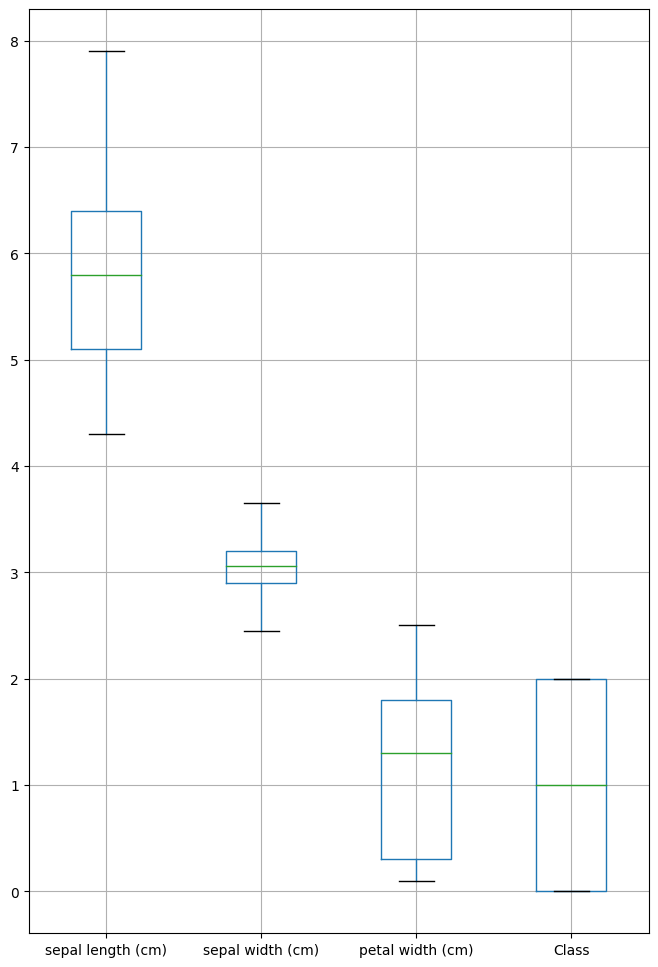

In [52]:
orgin_data.boxplot(figsize=(8,12))
plt.show()

In [53]:
orgin_data.shape

(150, 4)

Question-5: Plot the correlation and tell which feature will help the most
during prediction

Calculate correlation

Plot the correlation

Compare the correlation

<Axes: >

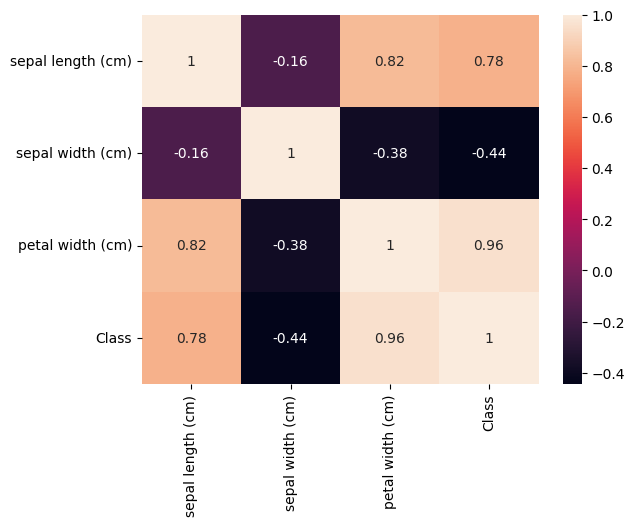

In [55]:
# plotting the correlation

correlation = orgin_data.corr()
sns.heatmap(correlation,annot=True)

Petal and Sepal width are highly correlated

Question-6: Split the data into training and testing datasets

Tasks to do:

Split the dataset using sklearn, with 20% for testing with random_state=7

In [57]:
X = orgin_data.iloc[:,:-1]
Y = orgin_data.iloc[:,-1]
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.20,random_state=7)
print("X Train shape",x_train.shape)
print("Y train shape",y_train.shape)
print("X test shape",x_test.shape)
print("y test shape",y_test.shape)

X Train shape (120, 3)
Y train shape (120,)
X test shape (30, 3)
y test shape (30,)


Question-7: Perform K-Fold cross validation

Tasks to do:

Perform K-fold with K=10 with random_state = 7

Perform K-Fold with commonly used classiÞcation algorithm

Calculate the mean score of each iteration

In [64]:
import warnings
warnings.filterwarnings("ignore")

#import the kfold
from sklearn.model_selection import cross_val_score,KFold

# Import Machine Learning Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

In [71]:
models = []

models.append(('lr',LogisticRegression()))
models.append(('decision_tree',DecisionTreeClassifier()))
models.append(('svm',SVC(gamma = 'auto')))
models.append(('knn',KNeighborsClassifier()))
models.append(('naive_bayes',GaussianNB()))
models.append(('Random_forest',RandomForestClassifier()))

for name,model in models:
 kfold=KFold(n_splits=10,random_state=7,shuffle=True)
 cross_val_sc=cross_val_score(model,X,Y,scoring='accuracy',cv=kfold)
 print('{} : acc: {}(standard deviation: {})'.format(name,round(cross_val_sc.mean(),2),round(cross_val_sc.std(),2)))


lr : acc: 0.95(standard deviation: 0.07)
decision_tree : acc: 0.94(standard deviation: 0.06)
svm : acc: 0.97(standard deviation: 0.04)
knn : acc: 0.95(standard deviation: 0.04)
naive_bayes : acc: 0.95(standard deviation: 0.08)
Random_forest : acc: 0.94(standard deviation: 0.07)


Question-8: Train the model

Tasks to do:
Train a logistic regression model for prediction
Also, predict the classes for test data

In [72]:
model = LogisticRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

Question-9: Evaluate the model
Print confusion matrix of the test data

Also, Þnd the precision and recall using classiÞcation report
Precision is the fraction of relevant instances among the retrieved instances

While recall (also known as sensitivity) is the fraction of the total amount of relevant
instances that were actually retrieved

In [73]:
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay

print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.82      0.75      0.78        12
           2       0.75      0.82      0.78        11

    accuracy                           0.83        30
   macro avg       0.86      0.86      0.86        30
weighted avg       0.84      0.83      0.83        30

[[7 0 0]
 [0 9 3]
 [0 2 9]]
